# Imports

In [1]:
import pathlib

# Constants

In [2]:
PROJECT_DIR = pathlib.Path('~/work').expanduser()
DATA_DIR = PROJECT_DIR / 'data'

In [3]:
# https://rstudio-pubs-static.s3.amazonaws.com/120883_c8123ff272164b2a94be097a6237150b.html
YELP_DATA_DIR = DATA_DIR / 'yelp' / 'v6' / 'yelp_dataset_challenge_academic_dataset'

# Example 3-1

Computing n-grams

In [4]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
with open(YELP_DATA_DIR / 'yelp_academic_dataset_business.json') as biz_f:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])

In [6]:
biz_df.shape

(61184, 15)

In [7]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,9,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,UsFtqoBl7naz8AVUBZMjQQ,"202 McClure St\nDravosburg, PA 15034",{},True,[Nightlife],Dravosburg,4,Clancy's Pub,[],-79.886930,PA,3.5,40.350519,"{'Happy Hour': True, 'Accepts Credit Cards': T...",business
2,cE27W9VPgO88Qxe4ol6y_g,"1530 Hamilton Rd\nBethel Park, PA 15234",{},False,"[Active Life, Mini Golf, Golf]",Bethel Park,5,Cool Springs Golf Center,[],-80.015910,PA,2.5,40.356896,{'Good for Kids': True},business
3,HZdLhv6COCleJMo7nPl-RA,"301 S Hills Vlg\nPittsburgh, PA 15241","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,3,Verizon Wireless,[],-80.059980,PA,3.5,40.357620,{},business
4,mVHrayjG3uZ_RLHkLj-AMg,"414 Hawkins Ave\nBraddock, PA 15104","{'Tuesday': {'close': '19:00', 'open': '10:00'...",True,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,11,Emil's Lounge,[],-79.866351,PA,4.5,40.408735,"{'Alcohol': 'full_bar', 'Noise Level': 'averag...",business


In [8]:
# Load the first 10,000 reviews
with open(YELP_DATA_DIR / 'yelp_academic_dataset_review.json') as f:
    review_df = pd.DataFrame([
        json.loads(f.readline()) for i in range(10000)
    ])

In [9]:
review_df.shape

(10000, 8)

In [10]:
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA


In [11]:
review_df['text'][0]

"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."

In [12]:
# Create feature transformers for unigrams, bigrams, and trigrams.
# The default ignores single-character words, which is useful in practice because
# it trims uninformative words, but we explicitly include them in this example for
# illustration purposes.
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')

In [13]:
# Fit the transformers and look at vocabulary size
bow_converter.fit(review_df['text'])
words = bow_converter.get_feature_names()
bigram_converter.fit(review_df['text'])
bigrams = bigram_converter.get_feature_names()
trigram_converter.fit(review_df['text'])
trigrams = trigram_converter.get_feature_names()
print (len(words), len(bigrams), len(trigrams))

26047 346301 847545


In [14]:
# Sneak a peek at the n-grams themselves
words[:10]

['0', '00', '000', '0002', '00am', '00ish', '00pm', '01', '01am', '02']

In [15]:
bigrams[-10:]

['zucchinis at',
 'zucchinis took',
 'zucchinis we',
 'zuma over',
 'zuppa di',
 'zuppa toscana',
 'zuppe di',
 'zurich and',
 'zz top',
 'à la']

In [16]:
trigrams[:10]

['0 10 definitely',
 '0 2 also',
 '0 25 per',
 '0 3 miles',
 '0 30 a',
 '0 30 everything',
 '0 30 lb',
 '0 35 tip',
 '0 5 curry',
 '0 5 pork']

# Figure 3-6

Number of unique n-grams in the first 10,000 reviews of the Yelp dataset

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

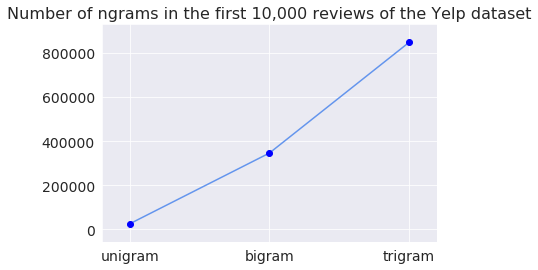

In [19]:
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize': 16})
plt.show()